<h1>Árboles de Clasificación<h1>

In [1]:
#importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<p>Primero leemos el archivo csv con el que se estara trabajando y mostramos los primeros 5 datos para observar las variables</p>

In [2]:
dfTrain = pd.read_csv("housing_train.csv")
dfTrain.shape
dfTrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<p>Mostramos la informacion de cada variable para seleccionar los valores que son de interes para la practica, en este caso se deberan tomar valores categoricos por ejemplo el estado de la casa,zona donde se ubica la vivienda, etc.

Se seleccionan las variables y se realiza un muestro para ver posibles valores nulos.</p>

In [3]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<p>Se realiza un filtrado con las columnas de nuestro interes para reducir el dataset y nuevamente se realiza un muestreo de las primeras variables.</p>

In [4]:
dfFilter1 = dfTrain[["LotConfig","BldgType","OverallCond",
                    "Exterior1st","SalePrice","LotFrontage"]]
dfFilter1.head()

,LotConfig,BldgType,OverallCond,Exterior1st,SalePrice,LotFrontage
0,Inside,1Fam,5,VinylSd,208500,65.0
1,FR2,1Fam,8,MetalSd,181500,80.0
2,Inside,1Fam,5,VinylSd,223500,68.0
3,Corner,1Fam,5,Wd Sdng,140000,60.0
4,FR2,1Fam,5,VinylSd,250000,84.0


<p>Ahora se puede realizar un conteo del tipo de variable, ya sea categorica (object), entera (int) o flotante (float).</p>

In [5]:
obj = (dfFilter1.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Variables Categoricas:",len(object_cols))
 
int_ = (dfFilter1.dtypes == 'int64')
num_cols = list(int_[int_].index)
print("variables Enteras:",len(num_cols))
 
fl = (dfFilter1.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Variables Flotantes:",len(fl_cols))

Variables Categoricas: 3
variables Enteras: 2
Variables Flotantes: 1


<p>Para un analisis mas profundo de los datos utilizados, se realiza un mapa de calor o matriz de correlación.</p>

<AxesSubplot:>

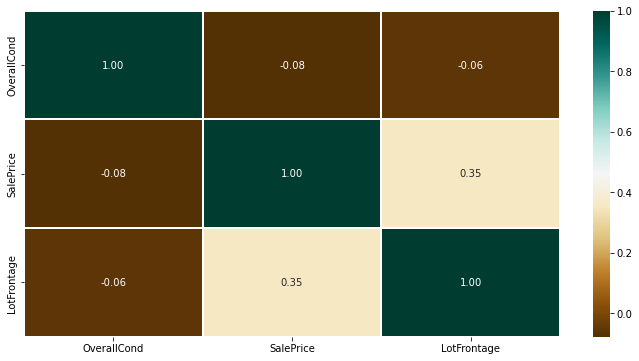

In [6]:
plt.figure(figsize=(12, 6))
sns.heatmap(dfFilter1.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<p>Para analizar las diferentes variables categoricas, se realizan distintos graficos de barras para observar su comportamiento.</p>

<AxesSubplot:title={'center':'No. de valores unicos de las variables categoricas'}>

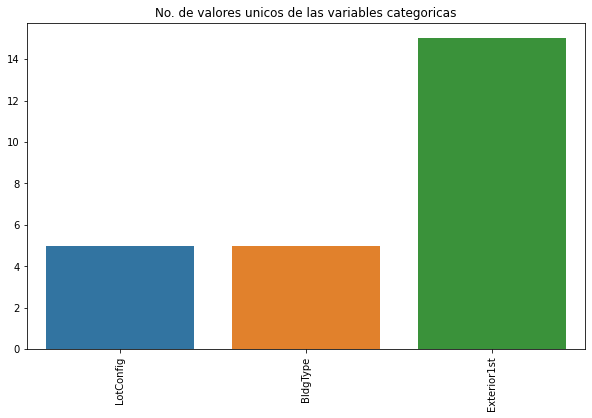

In [7]:
unique_values = []
for col in object_cols:
  unique_values.append(dfFilter1[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. de valores unicos de las variables categoricas')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

<p>Como se puede observar la variable con mas categorias es Exterior1st con 15 aproximadamente, la cual se refiere al tipo de revestimiento exterior de la casa. Para ver el resto de las categorias se crean mas graficos de barra para cada una de las variables</p>

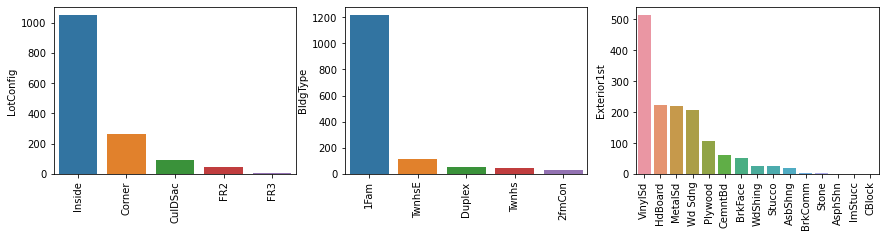

In [8]:
plt.figure(figsize=(20, 40))
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = dfFilter1[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

<AxesSubplot:ylabel='Exterior1st'>

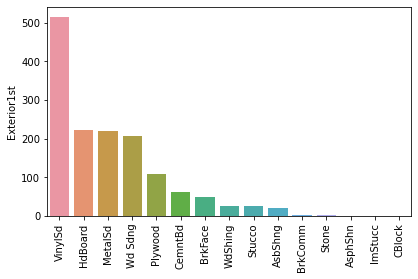

In [9]:
plt.figure(figsize=(30, 50))
plt.xticks(rotation=90)
index = 1
y = dfFilter1[col].value_counts()
plt.subplot(11, 4, index)
plt.xticks(rotation=90)
sns.barplot(x=list(y.index), y=y)

<p>Una vez identificada cada una de las variables y sus etiquetas,se puede identificar los valores nulos y darles el tratamiento adecuado dependiendo del set de datos</p>

In [10]:
dfFilter1.isnull().sum()

LotConfig        0
BldgType         0
OverallCond      0
Exterior1st      0
SalePrice        0
LotFrontage    259
dtype: int64

<p>En este caso como la variable solo presenta 259 datos nulos, se procedera a rellenar con una media la variable "LotFrontage"</p>

In [11]:
dfFilter1['LotFrontage'] = dfFilter1['LotFrontage'].fillna(
dfFilter1['LotFrontage'].mean())

C:\Users\jcarl\AppData\Local\Temp\ipykernel_28392\1333787699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFilter1['LotFrontage'] = dfFilter1['LotFrontage'].fillna(


In [12]:
dfFilter1.isnull().sum()

LotConfig      0
BldgType       0
OverallCond    0
Exterior1st    0
SalePrice      0
LotFrontage    0
dtype: int64

<p>Para convertir las variables de tipo categoricas a un formato que se pueda interpretar, se utiliza la funcion dummies de la libreria de pandas</p>

In [13]:
df = pd.get_dummies(data = dfFilter1,drop_first = True)

<p>Para crear nuestro arbol de decisión de regresión, se separa el set de datos en 2, dejaremos la parte de la variable objetivo que es el precio en eje y y el resto de variables en el eje X.</p> 

In [14]:
X = df.drop(columns='SalePrice')
y = df.SalePrice

<p>Para crear nuestro modelo se debera importar una nueva libreria para separar los conjuntos de informacion en sets de entrenamiento y sets de prueba</p>

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

<p>Posteriormente se importa una nueva libreria para realizar el arbol de clasificación, se le indica la profundidad que tendra el arbol y se pasan los sets de entrenamiento creados anteriormente y se muestra la representacion del arbol</p>

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=10,criterion='gini')
modelo1 = tree.fit(X_train,y_train)

In [17]:
from sklearn import tree
#fig = plt.figure(figsize=(25,20))

""""tree.plot_tree(
              decision_tree = modelo1,
              feature_names = X.columns,
              rounded=False,
             # class_names='SalePrice',
              fontsize = 10,
              precision = 2,
              filled = True);"""
#plt.show()

'"tree.plot_tree(\n              decision_tree = modelo1,\n              feature_names = X.columns,\n              rounded=False,\n             # class_names=\'SalePrice\',\n              fontsize = 10,\n              precision = 2,\n              filled = True);'

In [18]:
y_pred=modelo1.predict(X_test)
y_trainOut=modelo1.predict(X_train)

In [19]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_train, y_trainOut))
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(f'puntuación del modelo en los datos de entrenamiento: {modelo1.score(X_train, y_train)}')
print(f'puntuación del modelo en los datos de testing: {modelo1.score(X_test, y_test)}')

Accuracy: 0.2273972602739726
puntuación del modelo en los datos de entrenamiento: 0.2273972602739726
puntuación del modelo en los datos de testing: 0.00821917808219178


<p>Con esto se puede decir que este modelo no es bueno,ya que solo tiene un 0.022% de probabilidad de predecir el precio.

Se prueba a reducir el set de datos, eliminando la variable que mas etiquetas tiene, en este caso es "Exterior1st".</p>

In [20]:
dfFilter2 = dfFilter1.drop(columns='Exterior1st')
dfFilter2

,LotConfig,BldgType,OverallCond,SalePrice,LotFrontage
0,Inside,1Fam,5,208500,65.0
1,FR2,1Fam,8,181500,80.0
2,Inside,1Fam,5,223500,68.0
3,Corner,1Fam,5,140000,60.0
4,FR2,1Fam,5,250000,84.0
...,...,...,...,...,...
1455,Inside,1Fam,5,175000,62.0
1456,Inside,1Fam,6,210000,85.0
1457,Inside,1Fam,9,266500,66.0
1458,Inside,1Fam,6,142125,68.0


In [21]:
df2 = pd.get_dummies(data = dfFilter2,drop_first = True)

In [22]:
X2 = df2.drop(columns='SalePrice')
y2 = df2.SalePrice

In [23]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,test_size=0.20, random_state=0)
tree2 = DecisionTreeClassifier(max_depth=20,criterion='entropy')
modelo2 = tree2.fit(X_train2,y_train2)

In [24]:
y_pred2 = modelo2.predict(X2)

In [25]:
df2['Prediccion 2 del precio'] = y_pred2
df2.sample(10)[['SalePrice','Prediccion 2 del precio']]

,SalePrice,Prediccion 2 del precio
1402,193879,194500
732,222500,111000
30,40000,40000
1452,145000,140000
1116,184100,180000
989,197000,100000
1217,229456,139000
258,231500,119000
699,196000,196000
1251,171750,171750


In [26]:
y_trainOut2=modelo2.predict(X_train2)
print("Accuracy:",metrics.accuracy_score(y_train2, y_trainOut2))
print(f'puntuación del modelo en los datos de entrenamiento: {modelo2.score(X_train2, y_train2)}')
print(f'puntuación del modelo en los datos de testing: {modelo2.score(X_test2, y_test2)}')

Accuracy: 0.4041095890410959
puntuación del modelo en los datos de entrenamiento: 0.4041095890410959
puntuación del modelo en los datos de testing: 0.00684931506849315


<p>Como se puede observar nuestro modelo mejora respecto a los datos de aciertos y la puntuación del modelo, sin embargo sigue siendo ineficiente para este ejercicio.

Se puede realizar un mejor analisis con una grafica para ver que valores se relacionan mas con la variable objetivo.</p>

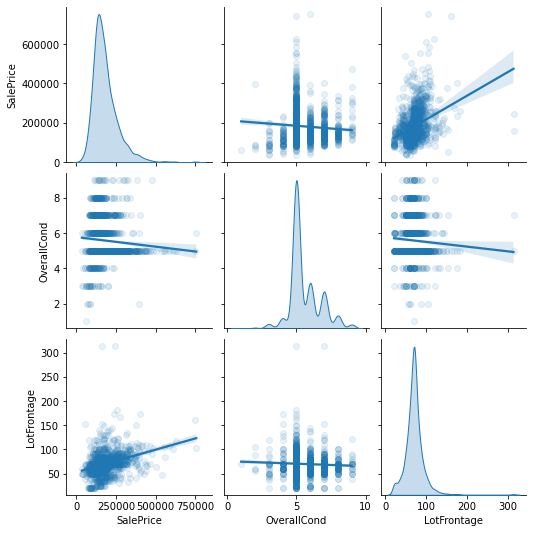

In [27]:
train_dataset = dfFilter2.copy()
#train_dataset.insert(0, "SalePrice", y_train2)
_ = sns.pairplot(
    train_dataset[['SalePrice', 'LotConfig', 'BldgType', 'OverallCond', 'LotFrontage']],
    kind='reg', diag_kind='kde', plot_kws={'scatter_kws': {'alpha': 0.1}})

<p>Vemos en la grafica que el precio de la vivienda parece estar postivamente correlacionado con la variable LotFrontage ya que presentan un comportamiento muy similar en las graficas. Con esto se podrian utilizar diferentes variables para realizar un mejor dataset o bien utilizar un modelo de regresión, como el anterior visto, ya que el modelo genera mejores resultados de predicción.</p>

<h1>Random Forest Clasificación</h1>

<p>Para esta practica, Reducideremos nuestros datos y utlizando la tecnica de bootstraping daremos el 1/10 de los datos para que sea mas facil de manejar para nuestros arboles.

Primero tomaremos los valores para armar nuestro modelo.</p>

In [28]:
dfFilter3 = dfFilter2[["BldgType","SalePrice","LotFrontage"]]
df3 = pd.get_dummies(data = dfFilter3,drop_first = True)
df_final = df3.sample(frac=1/10,replace=True)
df_final

,SalePrice,LotFrontage,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
152,190000,70.049958,0,0,0,0
481,374000,72.000000,0,0,0,0
1077,138800,70.049958,0,0,0,0
1159,185000,76.000000,0,0,0,0
1236,175500,36.000000,0,0,1,0
...,...,...,...,...,...,...
151,372402,107.000000,0,0,0,0
1210,189000,70.000000,0,0,0,0
679,128500,70.049958,0,0,0,0
418,126000,60.000000,0,0,0,0


In [29]:
X3 = df_final.drop(columns='SalePrice')
y3 = df_final.SalePrice

In [30]:
from sklearn.ensemble import RandomForestClassifier

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3,test_size=0.25, random_state=0)
forest=RandomForestClassifier(n_estimators = 100,
                              criterion = 'gini',
                              max_features = True,
                              max_samples = 1/10,
                              oob_score=True)

modelo3 = forest.fit(X_train3,y_train3)

In [31]:
y_trainOut3 = modelo3.predict(X_train3)
print("Accuracy:",metrics.accuracy_score(y_train3, y_trainOut3))
print(f'puntuación del modelo en los datos de entrenamiento: {modelo3.score(X_train3, y_train3)}')
print(f'puntuación del modelo en los datos de testing: {modelo3.score(X_test3, y_test3)}')

Accuracy: 0.28440366972477066
puntuación del modelo en los datos de entrenamiento: 0.28440366972477066
puntuación del modelo en los datos de testing: 0.02702702702702703


<p>Como se puede observar, con 100 arboles y reduciendo los valores mejora un poco el desempaño</p>

In [32]:
"""for arbol in forest.estimators_:
    tree.plot_tree(arbol,feature_names = df_final.columns[:-1])
    plt.show()"""

'for arbol in forest.estimators_:\n    tree.plot_tree(arbol,feature_names = df_final.columns[:-1])\n    plt.show()'

<p>Se crea la matriz de confusión, en este caso es dificil de interpretar debido a la gran cantidad de datos.</p>

In [33]:
y_pred3 = modelo3.predict(X_test3)
cm=metrics.confusion_matrix(y_test3,y_pred3)
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<p>Como conclusión para este set de datos, no fue muy efectivo realizar un proceso de clasificación de este set de datos.</p>